In [6]:

from Experiment import Experiment
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import matplotlib.cm as colormap
import numpy as np
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..','..'))
sys.path.insert(0, parent_dir)

import pickle
import numpy as np
import math
from Camera import Camera
from Frame import Frame
import matplotlib.pyplot as plt
import Utils
from scipy.spatial.distance import cdist

%matplotlib qt


loadir = 'H:/My Drive/dark 2022/csv_dark' # dir to save the data frame in # H:\My Drive\Ronis Exp\sagiv\data_analysis
# loadir = 'C:/Users/Roni/Documents'


exp_name =['manipulated_2022_02_03_dark','manipulated_2023_08_10_100ms','manipulated_2023_08_09_80ms','manipulated_2023_08_09_60ms','manipulated_2023_08_06_40ms','manipulated_12_8_23_blink20ms','manipulated_28_11_22_nopert','manipulated_11_8_23_blink40ms']
exp_name =['manipulated_2022_02_03_dark','manipulated_2023_08_10_100ms','manipulated_2023_08_09_80ms','manipulated_2023_08_09_60ms','manipulated_2023_08_06_40ms']
exp_name =['manipulated_2023_08_10_100ms','manipulated_2024_11_12_darkan','manipulated_2022_02_03_dark']#'manipulated_2023_08_10_100ms',

# exp_name =['manipulated_2023_08_09_60ms','manipulated_2022_02_03_dark']
exp_name =['manipulated_2023_08_09_60ms']#'manipulated_2024_11_12_darkan'
# exp_name =['manipulated_2023_08_07_5ms','manipulated_2023_08_07_10ms',
#            'manipulated_2022_03_10_20ms','manipulated_2023_08_06_40ms',
#            'manipulated_2023_08_09_60ms','manipulated_2023_08_09_80ms',
#            'manipulated_2023_08_10_100ms','manipulated_2022_02_03_dark','manipulated_2024_11_12_darkan']#,'manipulated_2024_11_12_darkan']
# exp_name = ['manipulated_2024_11_12_darkan','manipulated_2023_08_10_100ms','manipulated_2022_02_03_dark']
# ['manipulated_2023_08_07_10ms',
#             'manipulated_2023_08_06_40ms',
#            'manipulated_2023_08_09_60ms',
#            'manipulated_2023_08_09_80ms',
#            'manipulated_2023_08_10_100ms',
#            'manipulated_2022_02_03_dark',
#            'manipulated_2022_01_31_darkdown']
# exp_name = ['manipulated_28_11_22_nopert']

def dont_show_movs(exp_name,movs_to_del):
    return [mov_name for mov_name in experiments[exp_name].mov_names if mov_name not in movs_to_del ] 

mov_dark_delete = ['mov30','mov40','mov57','mov59']
mov_100_delete = ['mov10','mov102','mov19','mov34','mov35','mov47','mov51','mov52','mov66','mov68','mov73','mov90']
mov_80_delete = ['mov119','mov49','mov97','mov99']
mov_40_delete = ['mov64']
mov_60_delete = ['mov12','mov13','mov147','mov165','mov21','mov24','mov26','mov48','mov86']
mov_10_delete = ['mov46','mov54']
mov_5_delete = ['mov44']


color_map = colormap.datad["tab10"]['listed']

experiments = {exp:Experiment(loadir,exp,movie_length = 60) for exp in exp_name} # load experiments
experiments = {exp:Experiment(loadir,exp,movie_length = 100) for exp in exp_name} # load experiments


In [7]:
# calculations - projections, frequency, angles

[exp.from_vector_to_wing_body('Y_x_body',['vectors','body'])  for exp in experiments.values()] # smooth and derive


[exp.smooth_prop_movies('CM_real_x_body',['','_dot','_dot_dot'],'body')  for exp in experiments.values()] # smooth and derive


[exp.project_axes_movies(['X_x_body_projected','X_y_body_projected'], add_to_vectors = ['vectors','body'])  for exp in experiments.values()] # X_body axis projected to xy plane
[exp.project_axes_movies(['Y_x_body_projected','Y_y_body_projected'],axis = 'Y_x_body',add_to_vectors = ['vectors','body'])  for exp in experiments.values()] # X_body axis projected to xy plane

[exp.project_axes_movies(['CM_dot_xax','CM_dot_yax'],axis = 'CM_real_x_body_dot_smth',wing_body = 'body',add_to_vectors = ['body','vectors'])  for exp in experiments.values()] # Velocity direction in the projected X_body axes (xy plane) 

# calculate the size of the velocity projected on the xy plane
[exp.project_prop_movies('CM_real_x_body_dot_smth',header_name = 'CM_dot_x',three_col = 2,ax_to_proj = 'X_x_body_projected',add_to_vectors = True)  for exp in experiments.values()]
[exp.project_prop_movies('CM_real_x_body_dot_smth',header_name = 'CM_dot_y',three_col = 2,ax_to_proj = 'Y_x_body_projected',add_to_vectors = True)  for exp in experiments.values()]


# calculate the size of the acceleration projected on the xy plane
[exp.project_prop_movies('CM_real_x_body_dot_dot_smth',header_name = 'CM_dot_dot_x',three_col = 2,ax_to_proj = 'X_x_body_projected')  for exp in experiments.values()]
[exp.project_prop_movies('CM_real_x_body_dot_dot_smth',header_name = 'CM_dot_dot_y',three_col = 2,ax_to_proj = 'Y_x_body_projected')  for exp in experiments.values()]

[exp.pqr_movies() for exp in experiments.values()] # calculate p,q,r (angular velocity in body axis)



[exp.substruct_first_frame('yaw_body','body')  for exp in experiments.values()] # substract the zero frame from a property ( {prop}_min_ref_frame )

# calculate the difference between current direction and another one at the same time:
# the angle between Xbody on the xy plane and the velocity direction on the xy plane 
[exp.delta_ang_all_time_movies('X_x_body_projected','CM_dot_xax','slip_angle_beta',three_col = 2) for exp in experiments.values()] 
[exp.delta_ang_all_time_movies('X_x_body_projected','CM_dot_xax','slip_angle_beta_no_uw',three_col = 2,unwarped = False) for exp in experiments.values()] 

# calculate the difference in angle between current property and in referance frame:
# the angle between Xbody on the xy (in 0 time) plane and Xbody on xy plane 
[exp.delta_ref_ang_movies('X_x_body_projected','delta_ang_Xax',axis = 'X_x_body_projected')  for exp in experiments.values()]

# the angle between Xbody on the xy (in 0 time) plane and the velocity direction on the xy plane 
[exp.delta_ref_ang_movies('CM_dot_xax','delta_ang_CM_dot_x',axis = 'CM_dot_xax',delta_ang = 0) for exp in experiments.values()]


# the angle between Xbody on the xy (in 0 time) plane and the velocity direction on the xy plane 
[exp.delta_ref_ang_movies('CM_dot_x_projected','delta_ang_proj_v',axis = 'CM_dot_x_projected',delta_ang = 0) for exp in experiments.values()]
[exp.delta_ref_ang_movies('CM_dot_x_projected','delta_ang_proj_v_uw',axis = 'CM_dot_x_projected',delta_ang = 0,unwarped = False) for exp in experiments.values()]



# project velocity and accelerations
[exp.project_prop_all_axes_movies('CM_real_x_body_dot_smth',header_name = 'CM_dot_x',three_col = 2,ax_to_proj = 'X_x_body_projected')  for exp in experiments.values()]
[exp.project_prop_all_axes_movies('CM_real_x_body_dot_smth',header_name = 'CM_dot_y',three_col = 2,ax_to_proj = 'Y_x_body_projected')  for exp in experiments.values()]

[exp.project_prop_all_axes_movies('CM_real_x_body_dot_dot_smth',header_name = 'CM_dot_dot_y',three_col = 2,ax_to_proj = 'Y_x_body_projected')  for exp in experiments.values()]
[exp.project_prop_all_axes_movies('CM_real_x_body_dot_dot_smth',header_name = 'CM_dot_dot_x',three_col = 2,ax_to_proj = 'X_x_body_projected')  for exp in experiments.values()]

[exp.project_prop_all_axes_movies('CM_real_x_body_dot_dot_smth',header_name = 'CM_dot_dot_y_body',three_col = 2,ax_to_proj = 'Y_x_body')  for exp in experiments.values()]

# rotate for noams 3d traj plot
[exp.rotate_prop_movies('CM_real_x_body',['rotated_cm_x','rotated_cm_y','rotated_cm_z'],rotate_by_yaw = False) for exp in experiments.values()]

# calculate velocity and acceleration norma
[[exp.norm_prop_movies(f'CM_real_{ax}_body_dot_smth',f'vel_norm')  for exp in experiments.values()] for ax in ['x']]
[[exp.norm_prop_movies(f'CM_real_{ax}_body_dot_dot_smth',f'acc_norm')  for exp in experiments.values()] for ax in ['x']]
[exp.norm_prop_movies(f'slip_angle_beta',f'slip_angle_beta_norm',three_col = 1)  for exp in experiments.values()] 
[exp.substruct_first_frame('CM_dot_x_projected',wing_body='body') for exp in experiments.values()] 



# histogram calculations
exp = experiments[list(experiments.keys())[0]]
t_vec = [50,60,70,80,90,100]
max_t = 90 # time to mesure the angle
acc_dir = [exp.acc_dir_movies( t,'CM_dot_dot_x_projected') for t in t_vec]
angle_z = np.arcsin(acc_dir[t_vec == max_t][:,2])*180/np.pi 
angle_x = np.arccos(-acc_dir[t_vec == max_t][:,0])*180/np.pi



[exp.get_peaks_movies('acc_norm','respone_time',t0 = 15, t1 = 120,th = exp.th_for_response_time(th_mean = 1.9),th_mean = 1.9) for exp in experiments.values()]
[exp.get_peaks_movies('q','max') for exp in experiments.values()]
[exp.get_peaks_movies('CM_dot_dot_x_projected','min') for exp in experiments.values()]
[exp.get_peaks_movies('pitch_y_frame','max') for exp in experiments.values()]
[exp.get_peaks_movies('pitch_body','max') for exp in experiments.values()]
[exp.get_peaks_movies('CM_dot_x_projected','min',t0 = 15, t1 = 150) for exp in experiments.values()]
[exp.get_peaks_movies('delta_ang_Xax','max') for exp in experiments.values()]
[exp.get_peaks_movies('CM_dot_dot_x_projected','peaks_max',t0 = 5, t1 = 100) for exp in experiments.values()]
th = np.nanmean(np.hstack([exp.th_for_velocity_dec() for exp in experiments.values()])) # calculate the mean of the difference between velocity in t = 0 ms and t = 80 ms. (of all experiments)
[exp.get_peaks_movies('CM_dot_x_projected','slow',th = th,t0 = 55, t1 = 120) for exp in experiments.values()]  # use the calculated th, check for times >55 <120
[exp.get_peaks_movies('CM_dot_x_projected','half_v') for exp in experiments.values()]
[exp.get_peaks_movies('CM_dot_x_projected','time_point',time_point = 230) for exp in experiments.values()]

# [exp.subtract_interest_time_from_time('CM_dot_x_projected_zero_v','time_m_zero_v') for exp in experiments.values()]

[exp.get_peaks_movies('CM_dot_x_projected','zero_v',t0 = 15, t1 = 150) for exp in experiments.values()]
[exp.get_peaks_movies('CM_real_z_body_dot_smth','zero_v',t0 = 15, t1 = 150) for exp in experiments.values()]
[exp.calc_cone_angle_movies()  for exp in experiments.values()] 


# response time calculations: data that enters the analysis: mean of the acc[0: ref frame] > mean + std of mean of the acc[0: ref frame] (1.9)
#                             th for data that enters the anaylsis:  mean + std of mean of the acc[0: ref frame] that passed the previous th. 
#                             nan is - didnt pass the second. 999 is didnt enter the analysis

d:\Documents\model_gaussian_splatting\ground_truth\generate_gt_frames\Movie.py:198: RuntimeWarning:

invalid value encountered in arccos

d:\Documents\model_gaussian_splatting\ground_truth\generate_gt_frames\Movie.py:202: RuntimeWarning:

invalid value encountered in arccos



[None]

In [5]:
exp = experiments['manipulated_2023_08_09_60ms']
mov = exp.get_mov(exp.mov_names[0])

frames = mov.get_prop('frames','body')
frames

array([[ 372.],
       [ 373.],
       [ 374.],
       ...,
       [1565.],
       [1566.],
       [1567.]])

In [8]:



def bin_data_by_nearest_neighbor(combinations, dataset):
    """
    Bin dataset rows to the closest combination
    
    Args:
        combinations: numpy array of shape (N, 4) - your bin centers
        dataset: numpy array of shape (10N, 4) - data to be binned
    
    Returns:
        bin_indices: array of indices assigning each dataset row to a bin
        binned_data: list of arrays, where each array contains rows assigned to a bin
    """
    # Calculate pairwise distances between each dataset row and each combination
    distances = cdist(dataset, combinations)
    
    # Find the index of the closest combination for each dataset row
    bin_indices = np.argmin(distances, axis=1)
    
    # Group dataset rows by their assigned bins
    binned_data = [dataset[bin_indices == i] for i in range(len(combinations))]
    
    return bin_indices, binned_data

movs_to_skip = [8,113,72,38,47,51,66,80,98,152,155,165,83,150,118,124,143,147]
movs_to_skip = set([f'mov{mov}' for mov in movs_to_skip])
exp = experiments['manipulated_2023_08_09_60ms']
features_list = []
for mov_name in exp.mov_names:
    if mov_name in movs_to_skip:
        continue

    mov = exp.get_mov(mov_name)
    bod_angles = mov.get_prop('pitch_body','body',three_col=3)[:,:]
    rwing_angles = mov.get_prop('phi_rw','wing',three_col=3)[:,:]
    lwing_angles = mov.get_prop('phi_lw','wing',three_col=3)[:,:]
    frames = mov.get_prop('frames','body')
    mov_num = np.ones(frames.shape)*int(mov_name.split('mov')[1])

    features = np.hstack([bod_angles,rwing_angles,lwing_angles,frames,mov_num])
    features_list.append(features)


all_frames_movs = np.vstack(features_list)
all_frames_movs = all_frames_movs[all_frames_movs[:,1] < 120 ,:]
yaw_grid = np.arange(0,120,11)
phi_grid = np.arange(0,180,24)
grid = np.meshgrid(yaw_grid,phi_grid,phi_grid, indexing='ij')
combinations = np.stack(grid, axis=-1).reshape(-1, 3)
bin_indices, binned_data = bin_data_by_nearest_neighbor(np.atleast_2d(combinations), all_frames_movs[:,[1,3,6]])
all_frames_movs_idx = np.vstack(all_frames_movs)[:,[1,3,6]]
mean_cluster = np.vstack([np.mean(all_frames_movs_idx[bin_indices == cluster_idx,:], axis = 0) for cluster_idx in np.unique(bin_indices) if len(all_frames_movs_idx[bin_indices == cluster_idx,:]) > 30])
distances = cdist(mean_cluster,all_frames_movs_idx)
closest = np.argmin(distances,axis = 1)
frames_to_tag = all_frames_movs[closest,:]
idx_to_del = np.where((frames_to_tag[:,4] < -10) | (frames_to_tag[:,7] > 30) | (frames_to_tag[:,5] >180) | (frames_to_tag[:,8] > 180))


frames_to_tag = np.delete(frames_to_tag,idx_to_del,axis = 0)

# path_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
# np.savetxt(f'{path_save}/output_formatted.txt', frames_to_tag, fmt='%.0f')


In [9]:
binned_data

[array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64),
 array([[  3.56948624,  24.18470179,  35.53541928],
        [  3.93528349,  21.2719044 ,  32.73288046],
        [  4.31216996,  18.69459981,  30.93404732],
        [  4.69850018,  16.3083165 ,  29.53522979],
        [  5.09795245,  14.58031105,  29.26838623],
        [-19.77115798,  33.73083537,  33.91250502],
        [-19.94071657,  30.71176978,  30.32292868],
        [-20.09798654,  27.88148485,  28.30122306],
        [-20.23834614,  26.49329381,  27.06721799],
        [-20.36474543,  26.10080783,  26.82974793],
        [-20.47472354,  27.03734353,  27.82935422],
        [-20.56993921,  29.22317758,  30.03214333],
       

In [4]:

import numpy as np
yaw_grid = np.arange(0,120,11)
phi_grid = np.arange(0,180,24)

phi_grid

array([  0,  24,  48,  72,  96, 120, 144, 168])

In [26]:
plt.scatter(frames_to_tag[:,3],frames_to_tag[:,4])

In [51]:

path_frames_mov_eval = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/output_formatted.txt'
path_to_save = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
data_txt = np.loadtxt(path_frames_mov_eval)
movs = np.unique(data_txt[:,-1])

frames = data_txt[:,-2]
mov = data_txt[:,-1]


angle_dict = {}
keys = [f'mov_{mov.astype(int)}_frame_{frame.astype(int)}' for frame,mov in zip(frames,mov)]
for key,angles in zip(keys,data_txt):
    angle_dict[key] = {'body_angles':[float(angles[1]),-float(angles[0]),float(angles[2])]
                        ,'left_wing_angles': [float(-90+angles[6]),-float(angles[8]),float(angles[7])]
                        ,'right_wing_angles': [float(90-angles[3]),-float(angles[5]),-float(angles[4])],
                                    'right_wing_angle_joint1' : 0.0,
                                    'left_wing_angle_joint1' : -0.0,
                                    'right_wing_angle_joint2' : 0.0,
                                    'left_wing_angle_joint2' : -0.0,

                                    'right_wing_twist_joint1' : 0.0,
                                    'left_wing_twist_joint1' : -0.0,
                                    'right_wing_twist_joint2' : 0.0,
                                    'left_wing_twist_joint2' : -0.0}

Utils.pickle_file(angle_dict,f'{path_to_save}/nominal_initial_angles.pkl' )

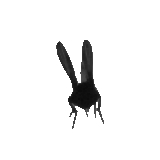

In [20]:
image_name = [f'P1027CAM{cam + 1}' for cam in range(4)]
movs_num = 30
path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{movs_num}_2024_11_12_darkan/'
fr = Frame(path,image_name[3],0, camera_path = path,delta_xy = 80, use_mask = False)

fr.im

In [6]:
image_name

NameError: name 'image_name' is not defined

In [47]:




from Frame import Frame
frames_dict = {}


import numpy as np
path_frames_mov_eval = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
data_txt = np.loadtxt(f'{path_frames_mov_eval}/output_formatted.txt')
movs = np.unique(data_txt[:,-1])


for movs_num in movs:
    movs_num = movs_num.astype(int)
    path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{movs_num}_2023_08_09_60ms/'

    frames_numbers = data_txt[data_txt[:,10] == movs_num,9].astype(int)
    image_name= []
    for frame in frames_numbers:
        image_name += [f'P{frame}CAM{cam + 1}' for cam in range(4)]

    frames = {f'{im_name}.jpg':Frame(path,im_name,idx, camera_path = path,delta_xy = 80, use_mask = False) for idx,im_name in enumerate(image_name)}


    for frame_number in frames_numbers:
        cams,base_images,frame_mov  = {},{},{}
        for idx in range(4):
            frame_original_name = f'P{frame_number}CAM{idx+1}.jpg'
            frame = frames[frame_original_name]
            base_images[frame.image_id] = frame.generate_base_image()
            frame_mov['real_frames'] = frames_numbers
            frame_mov['mov_name'] = movs_num
            frame_mov['image_path'] = f'{frame.path}/images/'

            frame.save_croped_images(image_name = f'mov{movs_num}_P{frame_number}CAM{idx+1}.jpg')
            cams[frame.camera_number] = frame.cams_for_gs()
            if idx == 0:
                rot_z = frames[frame_original_name].rotation_matrix_from_vectors(frames[frame_original_name].R[2,:], [0,0,1])
            cams[frame.camera_number]['ew_to_lab'] = rot_z
            cams[frame.camera_number]['bounding_box'] = frame.bounding_box
            
        frames_dict[frame_number] = [base_images,cams,[],frame_mov]

Utils.pickle_file(frames_dict,f'{path_frames_mov_eval}/frames_model_evaluation.pkl' )

In [ ]:
angle_dict['']

KeyError: ''